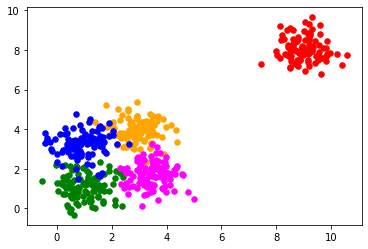

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 500
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8], [9.0, 8.0])
data, labels = make_blobs(n_samples=n_samples,
                          centers=blob_centers,
                          cluster_std=0.6,
                          random_state=0)


colours = ('green', 'orange', "blue", "magenta", 'red')
fig, ax = plt.subplots()

for n_class in range(len(blob_centers)):
    ax.scatter(data[labels==n_class][:, 0],
               data[labels==n_class][:, 1],
               c=colours[n_class],
               s=30,
               label=str(n_class))

In [2]:
from sklearn.model_selection import train_test_split
datasets = train_test_split(data,
                            labels,
                            test_size=0.3)

train_data, test_data, train_labels, test_labels = datasets

solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
The solver for weight optimization.

‘lbfgs’ is an optimizer in the family of quasi-Newton methods.

‘sgd’ refers to stochastic gradient descent.

‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

In [4]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs',
                    max_iter=500,
                    alpha=1e-5,
                    hidden_layer_sizes=(6,),
                    random_state=1)

clf.fit(train_data, train_labels)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6,), max_iter=500,
              random_state=1, solver='lbfgs')

In [5]:
clf.score(train_data, train_labels)

0.96

In [6]:
from sklearn.metrics import accuracy_score

predictions_train = clf.predict(train_data)
predictions_test = clf.predict(test_data)
train_score = accuracy_score(predictions_train, train_labels)
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, test_labels)
print("score on test data: ", test_score)

score on train data:  0.96
score on test data:  0.9133333333333333


In [7]:
predictions_train[:20]

array([1, 1, 4, 4, 2, 2, 0, 0, 4, 0, 0, 2, 4, 0, 4, 3, 2, 0, 3, 2])

In [8]:
#Multi-layer Perceptron
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
y = [0, 0, 0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

print(clf.fit(X, y))

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')


In [9]:
print("weights between input and first hidden layer:")
print(clf.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(clf.coefs_[1])

weights between input and first hidden layer:
[[-0.14203691 -1.18304359 -0.85567518 -4.53250719 -0.60466275]
 [-0.69781111 -3.5850093  -0.26436018 -4.39161248  0.06644423]]

weights between first hidden and second hidden layer:
[[ 0.29179638 -0.14155284]
 [ 4.02666592 -0.61556475]
 [-0.51677234  0.51479708]
 [ 7.37215202 -0.31936965]
 [ 0.32920668  0.64428109]]


In [10]:
print("w0 = ", clf.coefs_[0][0][0])
print("w1 = ", clf.coefs_[0][1][0])

w0 =  -0.14203691267827168
w1 =  -0.6978111149778699


In [11]:
clf.coefs_[0][:,0]

array([-0.14203691, -0.69781111])

In [12]:
#We can generalize the above to access a neuron  in the following way:

for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.14203691 -0.69781111], 
0 1 [-1.18304359 -3.5850093 ], 
0 2 [-0.85567518 -0.26436018], 
0 3 [-4.53250719 -4.39161248], 
0 4 [-0.60466275  0.06644423], 

1 0 [ 0.29179638  4.02666592 -0.51677234  7.37215202  0.32920668], 
1 1 [-0.14155284 -0.61556475  0.51479708 -0.31936965  0.64428109], 

2 0 [-4.96774269 -0.86330397], 



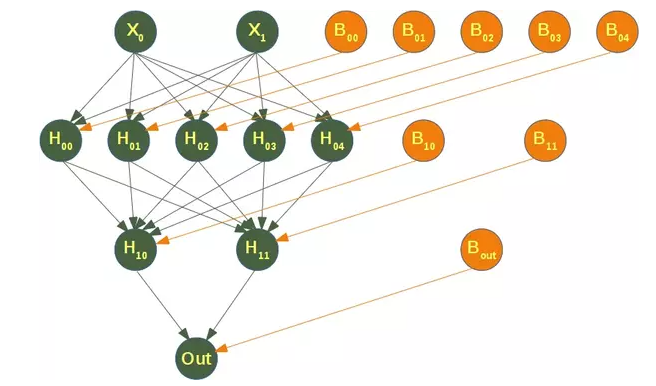

In [13]:
print("Bias values for first hidden layer:")
print(clf.intercepts_[0])
print("\nBias values for second hidden layer:")
print(clf.intercepts_[1])

Bias values for first hidden layer:
[-0.14962269 -0.59232707 -0.5472481   7.02667699 -0.87510813]

Bias values for second hidden layer:
[-3.61417672 -0.76834882]


In [14]:
result = clf.predict([[0, 0], [0, 1],
                      [1, 0], [0, 1],
                      [1, 1], [2., 2.],
                      [1.3, 1.3], [2, 4.8]])

In [15]:
#Instead of just looking at the class results, we can also use the predict_proba method to get the probability estimates.
prob_results = clf.predict_proba([[0, 0], [0, 1],
                                  [1, 0], [0, 1],
                                  [1, 1], [2., 2.],
                                  [1.3, 1.3], [2, 4.8]])
print(prob_results)

[[1.00000000e+000 5.25723951e-101]
 [1.00000000e+000 3.71534882e-031]
 [1.00000000e+000 6.47069178e-029]
 [1.00000000e+000 3.71534882e-031]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]]


**Complete Iris Dataset Example**

In [16]:
from sklearn.datasets import load_iris

iris = load_iris()

In [17]:
# splitting into train and test datasets

from sklearn.model_selection import train_test_split
datasets = train_test_split(iris.data, iris.target,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

In [18]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# we fit the train data
scaler.fit(train_data)

# scaling the train data
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

print(train_data[:3])

[[-1.10251195 -2.41469305 -0.19941012 -0.31489122]
 [-0.37357843 -0.36125329 -0.14257113  0.07872281]
 [ 0.23386617 -0.36125329  0.48265774  0.20992748]]


In [19]:
# Training the Model
from sklearn.neural_network import MLPClassifier
# creating an classifier from the model:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

# let's fit the training data to our model
mlp.fit(train_data, train_labels)

MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

In [20]:
from sklearn.metrics import accuracy_score

predictions_train = mlp.predict(train_data)
print('Train',accuracy_score(predictions_train, train_labels))
predictions_test = mlp.predict(test_data)
print('Test',accuracy_score(predictions_test, test_labels))

Train 0.9833333333333333
Test 0.9333333333333333


In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(predictions_train, train_labels)

array([[38,  0,  0],
       [ 0, 39,  1],
       [ 0,  1, 41]], dtype=int64)

In [22]:
confusion_matrix(predictions_test, test_labels)

array([[12,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  7]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report

print(classification_report(predictions_test, test_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      0.90      0.90        10
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



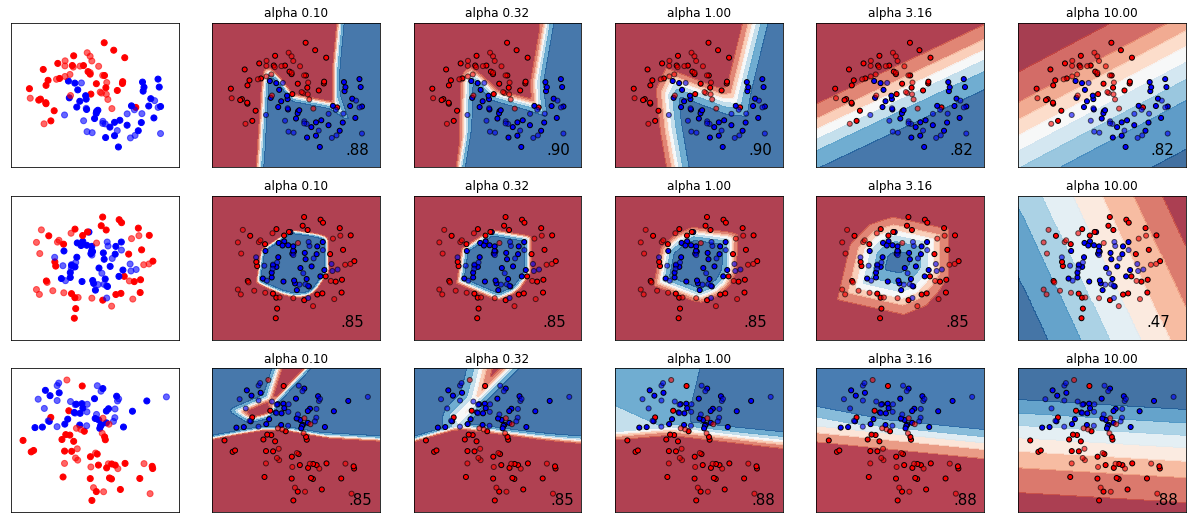

In [24]:

# code from: https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

h = .02  # step size in the mesh

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(make_pipeline(
        StandardScaler(),
        MLPClassifier(
            solver='lbfgs', alpha=alpha, random_state=1, max_iter=2000,
            early_stopping=True, hidden_layer_sizes=[100, 100],
        )
    ))
    names.append(f"alpha {alpha:.2f}")

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

**A Neural Network for the Digits Dataset**

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

(1797, 64)


In [ ]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [ ]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [ ]:
print("Shape of an item: ", digits.data[0].shape)
print("Data type of an item: ", type(digits.data[0]))
print("Shape of an item: ", digits.images[0].shape)
print("Data tpye of an item: ", type(digits.images[0]))

Shape of an item:  (64,)
Data type of an item:  <class 'numpy.ndarray'>
Shape of an item:  (8, 8)
Data tpye of an item:  <class 'numpy.ndarray'>


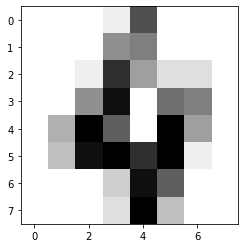

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[4], cmap='binary')
plt.show()

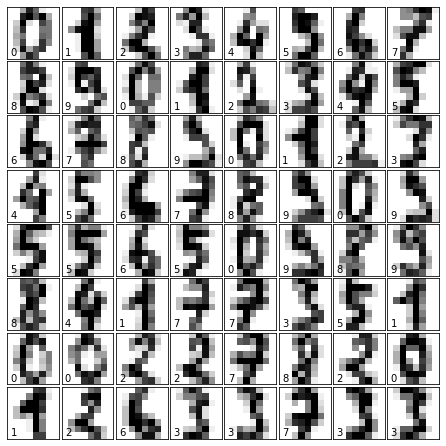

In [ ]:
import matplotlib.pyplot as plt
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

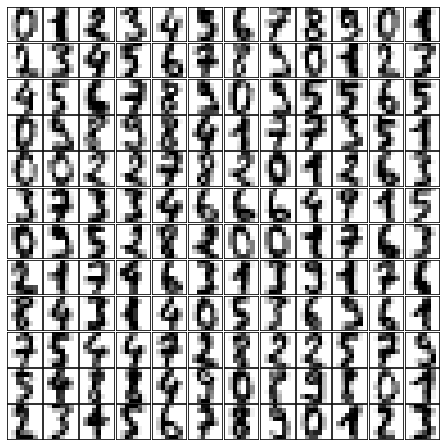

In [ ]:
import matplotlib.pyplot as plt
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(144):
    ax = fig.add_subplot(12, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    #ax.text(0, 7, str(digits.target[i]))

In [ ]:
from sklearn.model_selection import train_test_split


res = train_test_split(digits.data, digits.target,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(5,),
                    activation='logistic',
                    alpha=1e-4,
                    solver='sgd',
                    tol=1e-4,
                    random_state=1,
                    learning_rate_init=.3,
                    verbose=True)
mlp.fit(train_data, train_labels)

Iteration 1, loss = 2.25145782
Iteration 2, loss = 1.97730357
Iteration 3, loss = 1.66620880
Iteration 4, loss = 1.41353830
Iteration 5, loss = 1.29575643
Iteration 6, loss = 1.06663583
Iteration 7, loss = 0.95476869
Iteration 8, loss = 0.98840135
Iteration 9, loss = 0.85124323
Iteration 10, loss = 0.75499271
Iteration 11, loss = 0.80608405
Iteration 12, loss = 0.72358116
Iteration 13, loss = 0.68370817
Iteration 14, loss = 0.78455371
Iteration 15, loss = 0.71477343
Iteration 16, loss = 0.66806356
Iteration 17, loss = 0.81050074
Iteration 18, loss = 0.68337671
Iteration 19, loss = 0.74931776
Iteration 20, loss = 0.66185255
Iteration 21, loss = 0.77614665
Iteration 22, loss = 0.69448062
Iteration 23, loss = 0.70176765
Iteration 24, loss = 0.76440970
Iteration 25, loss = 0.70033401
Iteration 26, loss = 0.65138383
Iteration 27, loss = 0.59872788
Iteration 28, loss = 0.57207818
Iteration 29, loss = 0.62176226
Iteration 30, loss = 0.58669984
Iteration 31, loss = 0.54031128
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(5,),
              learning_rate_init=0.3, random_state=1, solver='sgd',
              verbose=True)

In [ ]:
predictions = mlp.predict(test_data)
predictions[:25] , test_labels[:25]

(array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 1, 8, 4, 1, 7, 3, 7, 1, 1, 1,
        8, 6, 0]),
 array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
        8, 6, 0]))

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, predictions)

0.8194444444444444

In [ ]:
for i in range(1, 35):
    mlp = MLPClassifier(hidden_layer_sizes=(i,),
                        activation='logistic',
                        random_state=1,
                        alpha=1e-4,
                        max_iter=10000,
                        solver='sgd',
                        tol=1e-4,
                        learning_rate_init=.3,
                        verbose=False)
    mlp.fit(train_data, train_labels)
    predictions = mlp.predict(test_data)
    acc_score = accuracy_score(test_labels, predictions)
    print(i, acc_score)

1 0.09722222222222222
2 0.3861111111111111
3 0.39444444444444443
4 0.45555555555555555
5 0.8194444444444444
6 0.8777777777777778
7 0.8777777777777778
8 0.8444444444444444
9 0.8722222222222222
10 0.9083333333333333
11 0.9194444444444444
12 0.9416666666666667
13 0.9611111111111111
14 0.9666666666666667
15 0.9305555555555556
16 0.9611111111111111
17 0.8111111111111111
18 0.9527777777777777
19 0.9361111111111111
20 0.9694444444444444
21 0.9638888888888889
22 0.9388888888888889
23 0.9555555555555556
24 0.9694444444444444
25 0.9611111111111111
26 0.975
27 0.9694444444444444
28 0.9555555555555556
29 0.9611111111111111
30 0.9694444444444444
31 0.9694444444444444
32 0.975
33 0.9694444444444444
34 0.9666666666666667
